In [1]:
!pip install openpyxl --upgrade --pre

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install emoji
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import os
import regex as re
import emoji
import pandas as pd
import numpy as np
import nltk
from nltk.stem import PorterStemmer
from collections import Counter, defaultdict
from nltk.corpus import stopwords
nltk.download('stopwords')
from string import punctuation
stemmer = PorterStemmer() 

sw = stopwords.words("english")
import openpyxl

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
!pip install textacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
# Add any additional import statements you need here
import html
from textacy import preprocessing
import string
import nltk

stop_words = set(stopwords.words("english"))

In [6]:
df = pd.read_excel('reddit-data_v1.xlsx')
df

,Unnamed: 0,subreddit,text
0,0,personalfinance,"# Welcome! Before making a post, please check..."
1,1,personalfinance,"### If you need help, please check the [PF Wik..."
2,2,personalfinance,Sorry if this doesn't fit in the subreddit but...
3,3,personalfinance,"As the title states, my sons are both in the h..."
4,4,personalfinance,So I purchased this vehicle in 2019 and my loa...
...,...,...,...
4808,910,story,Some people may not believe me but I’m telling...
4809,911,story,NaN
4810,912,story,"When i was a 7 year old, my dad was buying a l..."
4811,913,story,Me and my big bro went to play basketball this...


In [7]:
print(df['text'])

0       # Welcome!  Before making a post, please check...
1       ### If you need help, please check the [PF Wik...
2       Sorry if this doesn't fit in the subreddit but...
3       As the title states, my sons are both in the h...
4       So I purchased this vehicle in 2019 and my loa...
                              ...                        
4808    Some people may not believe me but I’m telling...
4809                                                  NaN
4810    When i was a 7 year old, my dad was buying a l...
4811    Me and my big bro went to play basketball this...
4812                                                  NaN
Name: text, Length: 4813, dtype: object


In [8]:
# create your clean twitter data here

## This calculates the impurity in an instance of tokens, used to find characters worth removing
RE_SUSPICIOUS = re.compile(r'[&#<>{}\[\]\\]')
def impurity(text, min_len=10):
    """returns the share of suspicious characters in a text""" 
    if text == None or len(text) < min_len:
        return 0 
    else:
        return len(RE_SUSPICIOUS.findall(text))/len(text)
    print(impurity(text))

## Function to clean the text by removing matches on the regex rules
def clean(text):
    # convert html escapes like &amp; to characters.
    text = html.unescape(text)
    # tags like <tab>
    text = re.sub(r'<[^<>]*>', ' ', text)
    # markdown URLs like [Some text](https://....)
    text = re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)', r'\1', text)
    # text or code in brackets like [0]
    text = re.sub(r'\[[^\[\]]*\]', ' ', text)
    # standalone sequences of specials, matches &# but not #cool
    text = re.sub(r'(?:^|\s)[&#<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ', text) # standalone sequences of hyphens like --- or ==
    text = re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', text)
    # sequences of white spaces
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'##',' ',text)
    text = re.sub(r'{{_}}',' ',text)
    text = re.sub(r'/\/',' ',text)
    text = re.sub(r'//\\',' ',text)
    text = re.sub(r'\\',' ',text)
    #Remove punctuation
    text = re.sub(r'[^\w\s]', ' ', text)
    return text.strip()

def normalize(text):
    text = preprocessing.normalize.hyphenated_words(text)
    text = preprocessing.normalize.quotation_marks(text)
    text = preprocessing.normalize.unicode(text)
    text = preprocessing.remove.accents(text)
    return text


def tokenize(text):
    return re.findall(r'[\w-]*\p{L}[\w-]*', text)

def remove_stop(tokens):
    return [stemmer.stem(t) for t in tokens if t.lower() not in stop_words]

pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline): 
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

In [9]:
df['text'] = df['text'].astype('string')

In [10]:
df['text'] = df['text'].fillna('')

In [11]:
df['clean_text'] = df['text'].map(clean)
df['clean_text'] = df['clean_text'].astype('string')
df['clean_text'] = df['clean_text'].map(normalize)
df['tokens'] = df['clean_text'].apply(prepare, pipeline=pipeline)
df.head()

,Unnamed: 0,subreddit,text,clean_text,tokens
0,0,personalfinance,"# Welcome! Before making a post, please check...",Welcome Before making a post please check ou...,"[welcom, make, post, pleas, check, great, reso..."
1,1,personalfinance,"### If you need help, please check the [PF Wik...",If you need help please check the PF Wiki to ...,"[need, help, pleas, check, pf, wiki, see, ques..."
2,2,personalfinance,Sorry if this doesn't fit in the subreddit but...,Sorry if this doesn t fit in the subreddit but...,"[sorri, fit, subreddit, idea, post, school, bu..."
3,3,personalfinance,"As the title states, my sons are both in the h...",As the title states my sons are both in the h...,"[titl, state, son, hospit, rsv, one, almost, d..."
4,4,personalfinance,So I purchased this vehicle in 2019 and my loa...,So I purchased this vehicle in 2019 and my loa...,"[purchas, vehicl, loan, 18k, interest, monthli..."


# LDA

In [12]:
df['tokens_joined'] = df['tokens'].apply(lambda x: ' '.join(x))
X = df['tokens_joined']

In [13]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from pprint import pprint

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis  

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


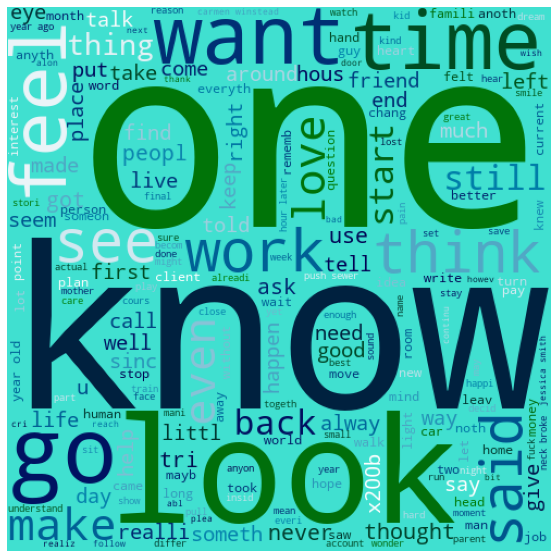

In [15]:
import wordcloud
from wordcloud import WordCloud

#combine all the articles
article_data = ""
for text in X:
    article_data = article_data+" "+text

#ploting the word cloud
plt.figure(figsize=(10, 10))
wordcloud = WordCloud(width = 500, height = 500, background_color='#40E0D0', colormap="ocean",  random_state=10).generate(article_data)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [16]:
full_corpus = []
for i in df['tokens']:
    full_corpus.append(i)

In [19]:
from gensim.corpora.dictionary import Dictionary
import warnings
warnings.filterwarnings('ignore')

# from gensim.models.ldamodel import LdaModel

# Create a corpus from a list of texts
id2word = Dictionary(full_corpus)

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in full_corpus]

In [20]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           minimum_phi_value = 0.01,
                                           alpha='symmetric',
                                           per_word_topics=True,
                                           eta = 0.6)

In [21]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.009*"one" + 0.009*"like" + 0.008*"back" + 0.007*"look" + 0.007*"said" + '
  '0.006*"time" + 0.005*"know" + 0.005*"see" + 0.005*"go" + 0.005*"could"'),
 (1,
  '0.011*"get" + 0.010*"like" + 0.009*"go" + 0.009*"friend" + 0.009*"want" + '
  '0.009*"year" + 0.008*"would" + 0.008*"start" + 0.008*"time" + 0.008*"one"'),
 (2,
  '0.018*"kali" + 0.017*"max" + 0.011*"_x000d_" + 0.008*"de" + 0.006*"trump" + '
  '0.006*"traci" + 0.005*"becca" + 0.004*"maddi" + 0.004*"mr" + '
  '0.003*"freind"'),
 (3,
  '0.037*"human" + 0.022*"li" + 0.020*"chong" + 0.020*"kong" + 0.018*"chi" + '
  '0.008*"com" + 0.007*"http" + 0.006*"audiobook" + 0.005*"weird" + '
  '0.004*"paperback"'),
 (4,
  '0.031*"sewer" + 0.025*"carmen" + 0.020*"push" + 0.017*"repost" + '
  '0.015*"girl" + 0.015*"jessica" + 0.014*"year" + 0.013*"shower" + '
  '0.012*"neck" + 0.011*"broke"')]


In [22]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.194553 -0.103855       1        1  45.912006
0     -0.177783 -0.114025       2        1  40.261638
4     -0.066746  0.305954       3        1   7.148678
3      0.231530 -0.074071       4        1   3.851305
2      0.207552 -0.014002       5        1   2.826372, topic_info=          Term         Freq        Total Category  logprob  loglift
1548     sewer  1117.000000  1117.000000  Default  30.0000  30.0000
3417     human   940.000000   940.000000  Default  29.0000  29.0000
139       year  2607.000000  2607.000000  Default  28.0000  28.0000
15869   carmen   890.000000   890.000000  Default  27.0000  27.0000
3928      girl  1555.000000  1555.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
18797  wildfir    22.889288    34.734464   Topic5  -6.4160   3.1491
4783       ass    28.113156   162.949476   Topic5  -6.2104   1.8090
10574    rumor    24.376032    55.287314   Topic5  -6.3530   2.7472
18249    shiki    28.374924   198.758584   Topic5  -6.2011   1.6196
1307         c    22.952144    67.506980   Topic5  -6.4132   2.4874

[333 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
7286      2  0.006575  _x000d_
7286      5  0.992816  _x000d_
438       1  0.992029  account
438       5  0.003647  account
144       1  0.990054    advic
...     ...       ...      ...
139       2  0.061356     year
139       3  0.185217     year
139       5  0.000383     year
5152      1  0.044180    youtu
5152      4  0.927790    youtu

[817 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 5, 4, 3])

# High conherence score is good for our model

In [23]:
# Compute Perplexity
print('\nPerplexity : ', lda_model.log_perplexity(corpus)) 

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=full_corpus, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity :  -7.864449835136433

Coherence Score:  0.48997197359774525
